### Please provide steps to convert an epoch Timestamp to
###  Datetime value
###  Date value


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
epoch_timestamps = [1640995200, 1641081600, 1641168000, 1641254400, 1641340800]

In [4]:
df = pd.DataFrame({'epoch_timestamp': epoch_timestamps})

In [6]:
## Converting to Datetime value
df['datetime_value'] = pd.to_datetime(df['epoch_timestamp'], unit='s')
df.head()

,epoch_timestamp,datetime_value
0,1640995200,2022-01-01
1,1641081600,2022-01-02
2,1641168000,2022-01-03
3,1641254400,2022-01-04
4,1641340800,2022-01-05


In [7]:
## Converting to Date value
df['date_value'] = df['datetime_value'].dt.date
df.head()

,epoch_timestamp,datetime_value,date_value
0,1640995200,2022-01-01,2022-01-01
1,1641081600,2022-01-02,2022-01-02
2,1641168000,2022-01-03,2022-01-03
3,1641254400,2022-01-04,2022-01-04
4,1641340800,2022-01-05,2022-01-05


In [8]:
#Using seaborn and matplotlib for the Visualization of data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=30, freq='D')
values = np.random.randn(30).cumsum() + 100

time_series_df = pd.DataFrame({
    'date': dates,
    'value': values
})

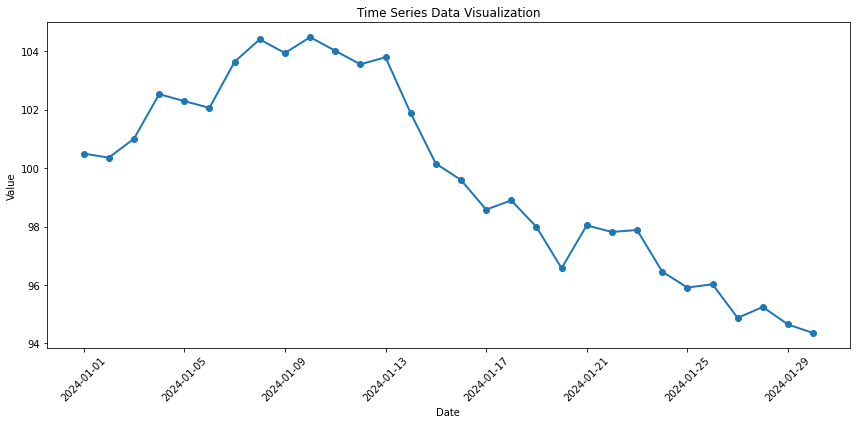

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['date'], time_series_df['value'], marker='o', linewidth=2)
plt.title('Time Series Data Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## This is Snowflake approach solution for converting date time value


In [ ]:
#Table creation in snowflake
CREATE OR REPLACE TABLE epoch_data (
    id NUMBER AUTOINCREMENT,
    epoch_timestamp NUMBER
);

#Inserting the values into table
-- Insert sample data
INSERT INTO epoch_data (epoch_timestamp) VALUES
(1640995200),
(1641081600),
(1641168000),
(1641254400),
(1641340800);

In [ ]:
#Query for convrting DateTime value
SELECT 
    epoch_timestamp,
    TO_TIMESTAMP_NTZ(epoch_timestamp) AS datetime_value,
FROM epoch_data;

In [ ]:
# Query for converting Date value
SELECT 
    epoch_timestamp,
    TO_DATE(TO_TIMESTAMP_NTZ(epoch_timestamp)) AS date_value
FROM epoch_data;

## for achieving “Desired Result” sheet format. Constraints to solution
## are mentioned below

In [18]:
#For the Excel sheet Problem 
#Use below formula in sheet 4 at column C
=INDEX({"a","b","c","d"},MATCH(B1,{"i","ii","iii","iv"},0))
#this will generate a,b,c,d in column C
=UPPER(B1)
#this above formula will generate the roman with uppar case